# Detrending

In many cases, trends in the input light curves can introduce false peaks and aliasing in the output lag distributions for many of the modules in pyPetal. This can be curbed by both weighting the output distributions or by detrending the light curves before analysis. pyPetal has both of these capabilities with the weighting and detrending modules. Here, we describe pyPetal's detrending capabilities.

pyPetal detrends by fitting light curves to a line, using the Monte Carlo sampling method provided by LinMix, described in <cite data-cite="kelly_aspects_2007">Kelly (2007)</cite>. While different situations necessitate more complex detrending methods, we provide a simple method to somewhat reduce aliasing issues. Different cases require different methods, and we encourage the user to seek out different detrending methods if pyPetal's detrending module doesn't suit their individual needs.

For more information on the fitting method, LinMix, please see the LinMix documentation and the corresponding paper <cite data-cite="kelly_aspects_2007">Kelly (2007)</cite>.

## Detrending Arguments

The arguments for the detrending module in pyPetal are largely similar to the arguments for LinMix:

* ``K``: The number of gaussians to use when fitting.
* ``nchain``: The number of chains to use for the Monte Carlo simulations.
* ``miniter``: The minimum number of iterations to use.
* ``maxiter``: The maximum number of iterations to use.

If ``threads`` $> 1$, pyPetal will let LinMix parallelize the Monte Carlo simulations across the number of threads chosen.

## Basic Usage

We can tell pyPetal to detrend both light curves simply by specifying ``run_detrend=True`` in ``run_pipeline``, much like all other modules. Here we'll use the continuum and ${\rm H}\beta$ light curves from RM017:

In [3]:
import pypetal.pipeline as pl

main_dir = 'pypetal/examples/dat/rm017_'
filenames = [ main_dir + 'cont.txt', main_dir + 'hb.txt' ]

output_dir = 'detrend_output/'
line_names = ['cont', 'hb']


Running detrending
-------------------
parallelize: False
K: 4
nchains: 5
miniter: 1000
maxiter: 5000
-------------------
    
m = 0.003 + 0.000 - -140.114
b = -140.112 + 6.774 - 6.872
sigsqr = 0.003 + 0.000 - 0.000


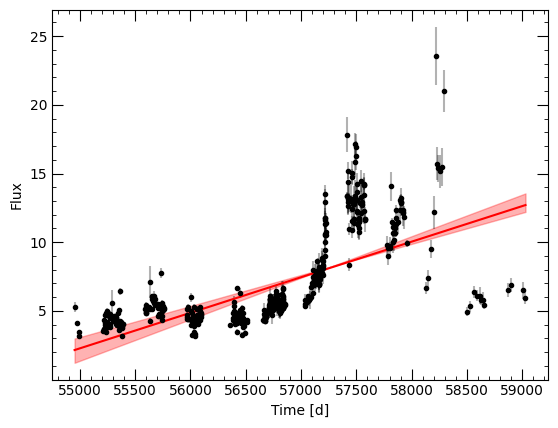

m = 0.041 + 0.006 - -2280.297
b = -2280.262 + 350.996 - 353.432
sigsqr = 0.041 + 0.006 - 0.006


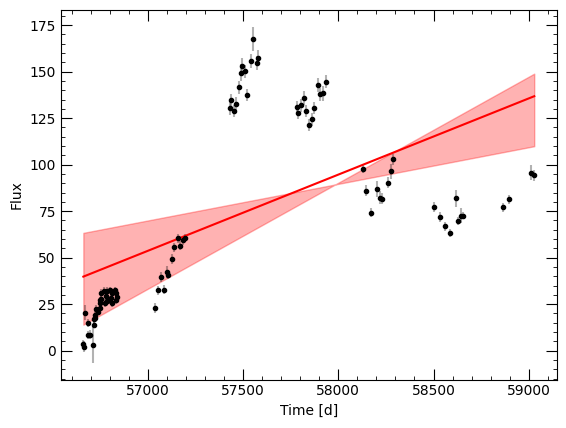

In [4]:
params = {
    'K': 4,
    'nchain': 5,
    'miniter': 1000,
    'maxiter': 5000
}

res = pl.run_pipeline( output_dir, filenames, line_names,
                       run_detrend=True,
                       detrend_params=params,
                       verbose=True,
                       plot=True,
                       file_fmt='ascii',
                       lc_unit='',
                       time_unit='d',
                       threads=20)

The median fit is shown as the red line in both plots, with each of the fit parameters ($m$, $b$) from $y = mx +b$ and the variance $\sigma^2$. The range of Monte Carlo samples is shown shaded in pink.

.. note:: If ``run_detrend=True``, all light curves will be detrended.

## Output Files

While the detrending module does not produce any output data, it does produce output figures and files. After each line is be detrended, it will be saved in the ``processed_lcs`` directory under ``(name)_data.dat``, where ``(name)`` is the name of the line.

.. warning:: If ``run_drw_rej=True`` and ``run_detrend=True``, the light curves without the rejected points after DRW rejection will be detrended. These detrended, processed light curves will then overwrite the light curve files in ``processed_lcs``.

In addition, a figure will be saved for each line in its directory, labeled ``detrend.pdf``, which shows the line fit to the original light curve. If ``reject_data=True`` for this line light curve, the light curve plotted will not have the rejected points determined in the DRW rejection process.

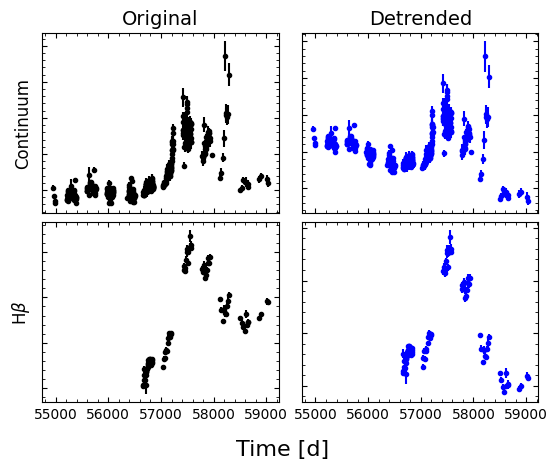

In [32]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(2,2, sharex='col')

x1, y1, yerr1 = np.loadtxt( 'detrend_output/light_curves/cont.dat', 
                           unpack=True, usecols=[0,1,2], delimiter=',' )
x2, y2, yerr2 = np.loadtxt( 'detrend_output/light_curves/hb.dat', unpack=True, usecols=[0,1,2], delimiter=',' )

x1d, y1d, yerr1d = np.loadtxt( 'detrend_output/processed_lcs/cont_data.dat', unpack=True, usecols=[0,1,2], delimiter=',' )
x2d, y2d, yerr2d = np.loadtxt( 'detrend_output/processed_lcs/hb_data.dat', unpack=True, usecols=[0,1,2], delimiter=',' )

ax[0,0].errorbar( x1, y1, yerr1, fmt='.k' )
ax[1,0].errorbar( x2, y2, yerr2, fmt='.k' )

ax[0,1].errorbar( x1d, y1d, yerr1d, fmt='.b' )
ax[1,1].errorbar( x2d, y2d, yerr2d, fmt='.b' )

ax[0,0].set_title( 'Original', fontsize=14 )
ax[0,1].set_title( 'Detrended', fontsize=14 )

ax[0,0].set_ylabel( 'Continuum', fontsize=12 )
ax[1,0].set_ylabel( r'H$\beta$', fontsize=12 )

for a in ax:
    for i in range(2):
        a[i].set_yticklabels([])
        
plt.figtext( .5, 0, 'Time [d]', ha='center', fontsize=16 )
        
plt.subplots_adjust( wspace=0.1, hspace=0.05 )
plt.show()

.. bibliography::